# Comenzamos con el procesamiento de imágenes (2)

Este Notebook es continuación del notebook *Comenzamos con el procesamiento de imágenes (1)*

In [1]:
# Para procesar las imágenes
from skimage import data

# Para procesamiento de matrices
import numpy as np

# Para mostrar las imágenes
import matplotlib.pyplot as plt

In [2]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

En el notebook anterior estimamos, para la imagen *coins* los máximos por fila y columna

In [3]:
coins = data.coins()

In [32]:
# Máximos por filas
max_per_row = np.max(coins, axis=1)
max_per_column = np.max(coins, axis=0)

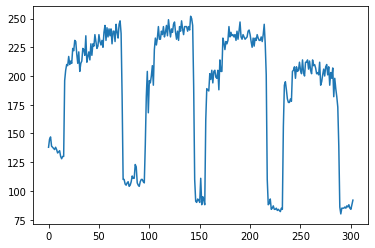

In [5]:
# Vamos a representar ahora el máximo por filas
plt.plot(max_per_row)
plt.show()

Vamos a binarizar la señal anterior. Es decir, vamos a fijar un umbral y todo lo que sea mayor que ese umbral lo fijaremos a valor 255 (blanco) y lo que esté por debajo, lo fijaremos a valor 0 (negro).

In [6]:
umbral = 160
binary_max_per_row = 255 * (max_per_row > umbral)

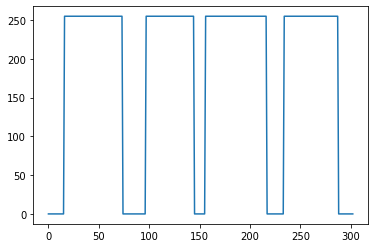

In [7]:
plt.plot(binary_max_per_row)
plt.show()

In [8]:
# Hacemos una copia de la imagen para hacer nuestras pruebas
test_coins = coins.copy()

In [9]:
# Todos aquellas posiciones del vector que tengan valores que iguales a 0 los modifico en la imagen poniéndolos
# también a 255.
test_coins[binary_max_per_row==0,:] = 255

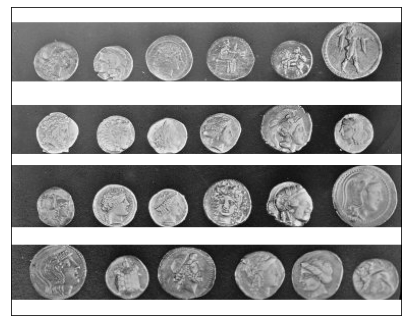

In [10]:
imshow(test_coins)

De esta manera, me quedo con un acotamiento de dónde están las monedas. Este tipo de estrategias sirven para detectar objetos alineados (como puede ser la información dentro de un DNI).

Si repetimos la misma operación para las componentes verticales, veamos qué sucede.

In [11]:
# Máximos por columnas
max_per_columns = np.max(coins,axis=0)

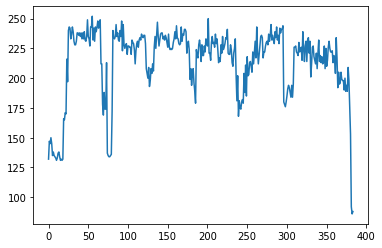

In [12]:
# Vamos a representar ahora el máximo por filas
plt.plot(max_per_columns)
plt.show()

Aquí el umbral es más complicado de elegir. En este caso, podemos ver que existen 6 mínimos, correspondientes a las 6 monedas que tenemos por cada fila.

Se puede decir que estos mínimos están, aproximadamente (que es lo que buscamos ahora), en las posiciones: 75, 130, 180, 240, 290.

Por supuesto, estos mínimos se pueden obtener de forma más elegante con un algoritmo de detección de mínimos locales (from scipy.signal import argrelextrema)

In [13]:
local_minima = np.array([75,130,180,240,290])

In [14]:
local_minima

array([ 75, 130, 180, 240, 290])

In [15]:
test_coins[:,local_minima] = 255

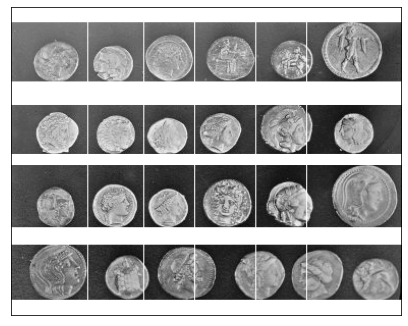

In [16]:
imshow(test_coins)

In [ ]:
# A partir de aqui son mis experimentos!!!

In [18]:
# Utilizamos un umbral de 160

umbral = 160
print(max_per_row > umbral) # Vector binario
binary_max_per_row = 255 * (max_per_row > umbral) # Vector con valores entre 0 o 255
print(binary_max_per_row)

[False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
  True  True  True  True  True  True  True  True  T

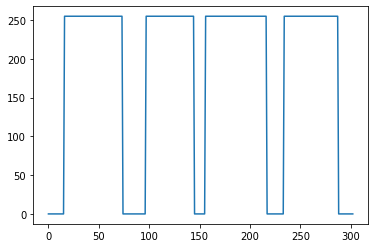

In [19]:
# Hemos digitalizando la señal anterior
plt.plot(binary_max_per_row)

In [74]:
# Guardamos una copia de la imagen en memoria
test_coins = coins.copy()

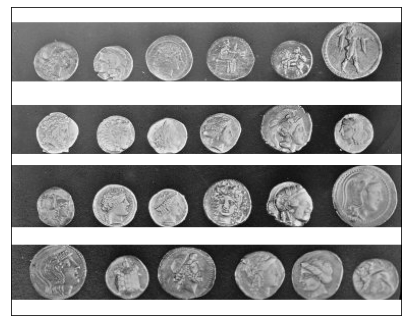

In [29]:
# print(binary_max_per_row == 0) # Creamos un vector booleano con True cuando el valor es cero.

# Todas las filas con valor maximo binario 0 y lo pintamos de blanco
test_coins[binary_max_per_row == 0, :] = 255
imshow(test_coins)

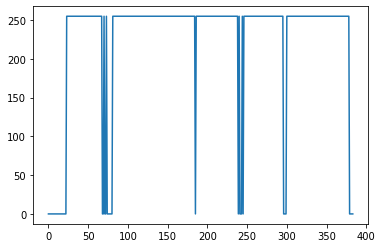

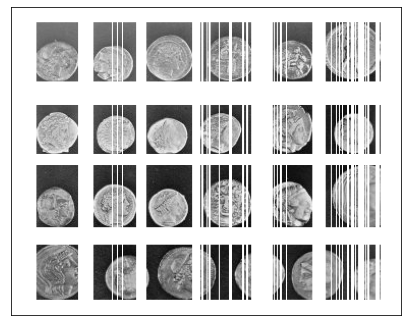

In [42]:
umbral_column = 180
binary_max_per_column = 255 * (max_per_column > umbral_column) # Vector con valores entre 0 o 255
plt.plot(binary_max_per_column)

test_coins[:, binary_max_per_column == 0] = 255
imshow(test_coins)

[ 55  92 201 280 320]


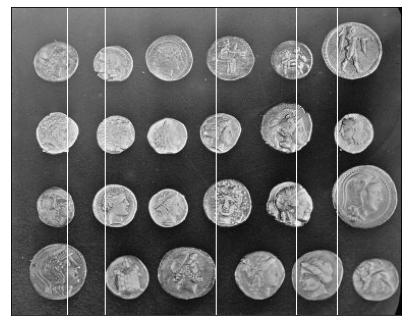

In [120]:
# Como vemos en las columnas un umbral no nos servira, tendremos que utilizar minimos locales
from scipy.signal import argrelextrema, find_peaks
test_coins = coins.copy()

# index_data = scipy.signal.find_peaks(
#         max_per_column,
#         prominence=prominence
#     )
# index_data[0]

index_data, _ = find_peaks(
        max_per_column,
        prominence=60
    )
print(index_data)
test_coins[:, index_data] = 255
imshow(test_coins)